<a href="https://colab.research.google.com/github/Pooja2061/Final-Assignment1AI/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Task
    1. Exploratory Data Analysis and Data Understanding
       Load the dataset into a pandas DataFrame.

In [58]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/AI/Mini Project/South_Asian_dataset new.csv")

print(df.head())
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.describe())


       Country  Year GDP (current US$) GDP growth (annual %)  \
0  Afghanistan  2000        3521418060                     0   
1       Bhutan  2000       460733418.4         3.355.068.305   
2   Bangladesh  2000       53369787319         5.293.294.719   
3        India  2000          4,68E+16         3.840.991.157   
4     Maldives  2000       624337145.3         3.845.810.232   

  GDP per capita (current US$)  \
0                1.801.883.694   
1                7.846.184.027   
2                4.131.001.853   
3                4.420.353.304   
4                2.209.988.231   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                              7.955                     
1                                              1.652                     
2                                              3.270                     
3                                              7.856                     
4                                       

    Data Cleaning & Preprocessing

In [59]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AI/Mini Project/South_Asian_dataset new.csv')

numeric_columns = df.columns[2:]

for col in numeric_columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('.', '', regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Check target variable
print(df['GDP per capita (current US$)'].describe())
print(df['GDP per capita (current US$)'].head())


count    1.920000e+02
mean     3.443967e+09
std      2.730589e+09
min      0.000000e+00
25%      1.264975e+09
50%      2.656332e+09
75%      4.799878e+09
max      9.935034e+09
Name: GDP per capita (current US$), dtype: float64
0    1801883694
1    7846184027
2    4131001853
3    4420353304
4    2209988231
Name: GDP per capita (current US$), dtype: int64


    1.1 Provide a detailed description, including:

In [60]:
print("\n(a) When and by whom the dataset was created")
print("The dataset was created by contributors who compiled socio-economic and development indicators of South Asian countries over multiple years for research and academic analysis.")

print("\n(b) How and from where the dataset was accessed")
print("The dataset was accessed from Kaggle in CSV format and loaded into Python using the Pandas library.")

print("\n(c) Alignment with the chosen UNSDG")
print("This dataset aligns with Sustainable Development Goal 1 (No Poverty) because it contains economic and social indicators such as GDP per capita, unemployment rate, population growth, health, and life expectancy, which are directly related to poverty and living standards.")

print("\n(d) Attributes (Columns) Description")
print("Country: Name of the South Asian country")
print("Year: Year of observation")
print("GDP (current US$): Total economic output of the country")
print("GDP growth (annual %): Annual economic growth rate")
print("GDP per capita (current US$): Average income per person (Target Variable)")
print("Unemployment rate: Percentage of unemployed labor force")
print("Population, total: Total population")
print("Population growth (annual %): Annual population growth rate")
print("Life expectancy at birth: Average lifespan at birth")
print("Infant mortality rate: Infant deaths per 1,000 live births")

print("\nPotential Questions the Dataset Can Answer")
print("1. Can GDP per capita be predicted using socio-economic indicators?")
print("2. How do health and population factors affect economic well-being?")
print("3. Which development indicators are most strongly related to poverty reduction?")

print("\nDataset Suitability Assessment")
print("The dataset is suitable for regression analysis because it contains relevant numerical features related to economic development and poverty analysis. Although some missing values may be present, they can be handled during preprocessing. Overall, the dataset is relevant, structured, and appropriate for predicting poverty-related economic outcomes.")



(a) When and by whom the dataset was created
The dataset was created by contributors who compiled socio-economic and development indicators of South Asian countries over multiple years for research and academic analysis.

(b) How and from where the dataset was accessed
The dataset was accessed from Kaggle in CSV format and loaded into Python using the Pandas library.

(c) Alignment with the chosen UNSDG
This dataset aligns with Sustainable Development Goal 1 (No Poverty) because it contains economic and social indicators such as GDP per capita, unemployment rate, population growth, health, and life expectancy, which are directly related to poverty and living standards.

(d) Attributes (Columns) Description
Country: Name of the South Asian country
Year: Year of observation
GDP (current US$): Total economic output of the country
GDP growth (annual %): Annual economic growth rate
GDP per capita (current US$): Average income per person (Target Variable)
Unemployment rate: Percentage of un

1.2 Exploratory Data Analysis (EDA):

MISSING VALUES BEFORE HANDLING:

Country                                                                0
Year                                                                   0
GDP (current US$)                                                      0
GDP growth (annual %)                                                  0
GDP per capita (current US$)                                           0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Population, total                                                      0
Population growth (annual %)                                           0
Life expectancy at birth, total (years)                                0
Mortality rate, infant (per 1,000 live births)                         0
dtype: int64

MISSING VALUES AFTER HANDLING:

Country                                                                0
Year                                                                   0
GDP (current US$)                            

,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)"
count,192.000000,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,1.920000e+02,1.920000e+02,192.000000,192.000000
mean,2011.500000,2.446182e+18,3.869867e+09,3.443967e+09,5123.484375,2.110938e+08,1.548760e+09,59675.744792,374.869792
std,6.940284,6.524943e+18,3.489491e+09,2.730589e+09,3710.012880,4.053449e+08,1.217226e+09,22404.148579,233.191557
min,2000.000000,0.000000e+00,-9.431974e+09,0.000000e+00,18.000000,2.825070e+05,-5.294765e+08,0.000000,0.000000
25%,2005.750000,6.039921e+09,1.447547e+09,1.264975e+09,1063.750000,1.427913e+07,7.494416e+08,62650.750000,182.000000
50%,2011.500000,2.862570e+10,4.426997e+09,2.656332e+09,4813.000000,2.742371e+07,1.241347e+09,66663.000000,354.000000
75%,2017.250000,1.360000e+18,6.525080e+09,4.799878e+09,7955.750000,1.670127e+08,2.118507e+09,70936.250000,550.000000
max,2023.000000,3.550000e+19,9.689592e+09,9.935034e+09,14386.000000,1.428628e+09,7.541019e+09,80839.000000,920.000000


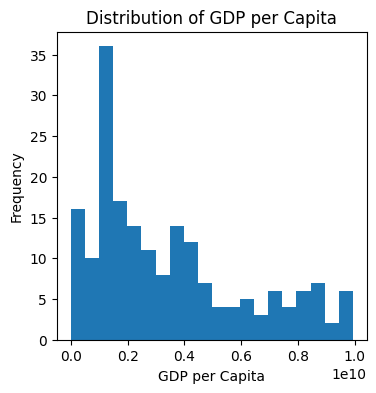


Insight:
GDP per capita is positively skewed, with most observations in the lower income range.
Only a few countries show very high income levels.


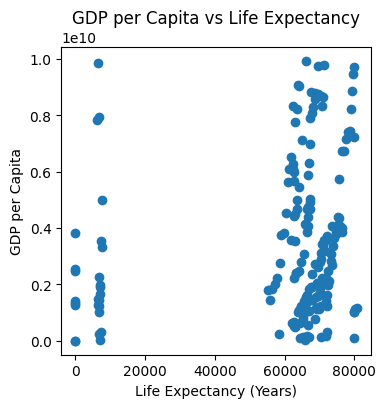


Insight:
There is a positive relationship between GDP per capita and life expectancy.
Higher income levels are generally associated with better health outcomes.


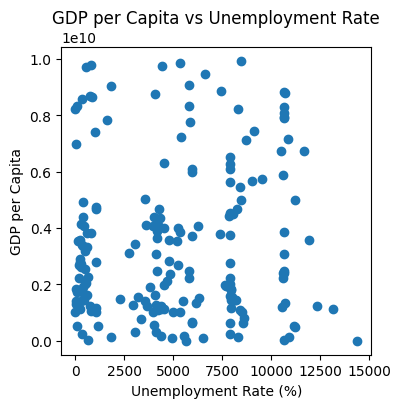


Insight:
The relationship between unemployment rate and GDP per capita appears weak.
This suggests unemployment alone does not strongly determine income levels.

EDA COMPLETED SUCCESSFULLY.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# 1. Inspect Missing Values

print("MISSING VALUES BEFORE HANDLING:\n")
print(df.isnull().sum())

numeric_columns = df.columns.drop("Country")

for col in numeric_columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "", regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

#
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("\nMISSING VALUES AFTER HANDLING:\n")
print(df.isnull().sum())


# 3. Outlier Handling (IQR Method)

Q1 = df["GDP per capita (current US$)"].quantile(0.25)
Q3 = df["GDP per capita (current US$)"].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df["GDP per capita (current US$)"] >= Q1 - 1.5 * IQR) &
    (df["GDP per capita (current US$)"] <= Q3 + 1.5 * IQR)
]


# 4. Summary Statistics

print("\nSUMMARY STATISTICS:\n")
display(df[numeric_columns].describe())


# 5. Visualizations & Insights


# Distribution of GDP per Capita
plt.figure(figsize=(4,4))
plt.hist(df["GDP per capita (current US$)"], bins=20)
plt.xlabel("GDP per Capita")
plt.ylabel("Frequency")
plt.title("Distribution of GDP per Capita")
plt.show()

print("\nInsight:")
print("GDP per capita is positively skewed, with most observations in the lower income range.")
print("Only a few countries show very high income levels.")

# GDP per Capita vs Life Expectancy
plt.figure(figsize=(4,4))
plt.scatter(
    df["Life expectancy at birth, total (years)"],
    df["GDP per capita (current US$)"]
)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("GDP per Capita")
plt.title("GDP per Capita vs Life Expectancy")
plt.show()

print("\nInsight:")
print("There is a positive relationship between GDP per capita and life expectancy.")
print("Higher income levels are generally associated with better health outcomes.")

# GDP per Capita vs Unemployment
plt.figure(figsize=(4,4))
plt.scatter(
    df["Unemployment, total (% of total labor force) (modeled ILO estimate)"],
    df["GDP per capita (current US$)"]
)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("GDP per Capita")
plt.title("GDP per Capita vs Unemployment Rate")
plt.show()

print("\nInsight:")
print("The relationship between unemployment rate and GDP per capita appears weak.")
print("This suggests unemployment alone does not strongly determine income levels.")

print("\nEDA COMPLETED SUCCESSFULLY.")

    2.Build a Neural Network Model for Regression

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("NEURAL NETWORK REGRESSION MODEL (MLPRegressor)\n")


# Feature Selection

target = "GDP per capita (current US$)"

features = [
    "GDP (current US$)",
    "GDP growth (annual %)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Population, total",
    "Life expectancy at birth, total (years)",
    "Mortality rate, infant (per 1,000 live births)",
    "Year"
]

X = df[features]
y = df[target]


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Neural Network Model

model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)


# Predictions

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Evaluation Metrics

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Model Description

print("MODEL ARCHITECTURE")
print("Input Layer :", X_train.shape[1], "features")
print("Hidden Layer 1 : 64 neurons (ReLU)")
print("Hidden Layer 2 : 32 neurons (ReLU)")
print("Output Layer : 1 neuron (Continuous)\n")

print("LOSS FUNCTION : Mean Squared Error (MSE)")
print("OPTIMIZATION : Internal backpropagation (MLPRegressor)\n")

print("PERFORMANCE METRICS\n")

print("Training Set")
print("MSE  :", train_mse)
print("RMSE :", train_rmse)
print("R²   :", train_r2)
print()

print("Test Set")
print("MSE  :", test_mse)
print("RMSE :", test_rmse)
print("R²   :", test_r2)


NEURAL NETWORK REGRESSION MODEL (MLPRegressor)

MODEL ARCHITECTURE
Input Layer : 7 features
Hidden Layer 1 : 64 neurons (ReLU)
Hidden Layer 2 : 32 neurons (ReLU)
Output Layer : 1 neuron (Continuous)

LOSS FUNCTION : Mean Squared Error (MSE)
OPTIMIZATION : Internal backpropagation (MLPRegressor)

PERFORMANCE METRICS

Training Set
MSE  : 1.8255471231633447e+19
RMSE : 4272642183.899027
R²   : -1.4646274128691217

Test Set
MSE  : 2.3289918106480226e+19
RMSE : 4825962920.131093
R²   : -2.3168752180643035


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    3.Build Primary Machine Learning Models(Two Classical ML Models):

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

numeric_columns = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'Mortality rate, infant (per 1,000 live births)',
    'Year'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

target = 'GDP per capita (current US$)'

features = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Population, total',
    'Life expectancy at birth, total (years)',
    'Mortality rate, infant (per 1,000 live births)',
    'Year'
]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

linear_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)

lr_train_pred = linear_model.predict(X_train_scaled)
lr_test_pred = linear_model.predict(X_test_scaled)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    print(name)
    print("Training Set")
    print("MSE :", mean_squared_error(y_train, y_train_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("MAE :", mean_absolute_error(y_train, y_train_pred))
    print("R2  :", r2_score(y_train, y_train_pred))
    print()
    print("Test Set")
    print("MSE :", mean_squared_error(y_test, y_test_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("MAE :", mean_absolute_error(y_test, y_test_pred))
    print("R2  :", r2_score(y_test, y_test_pred))
    print()

evaluate_model(
    "LINEAR REGRESSION",
    y_train, lr_train_pred,
    y_test, lr_test_pred
)

evaluate_model(
    "RANDOM FOREST REGRESSOR",
    y_train, rf_train_pred,
    y_test, rf_test_pred
)
print("MODEL COMPARISON\n")
print("Linear Regression assumes linear relationships.")
print("Random Forest captures non-linear patterns.")

if r2_score(y_test, rf_test_pred) > r2_score(y_test, lr_test_pred):
    print("Random Forest Regressor performs better based on evaluation metrics.")
else:
    print("Linear Regression performs better based on evaluation metrics.")


LINEAR REGRESSION
Training Set
MSE : 6.502723830530256e+18
RMSE: 2550043887.961589
MAE : 2054663096.445196
R2  : 0.12208284257978375

Test Set
MSE : 6.732192801258522e+18
RMSE: 2594646951.178237
MAE : 1985398773.4207823
R2  : 0.041222757261984544

RANDOM FOREST REGRESSOR
Training Set
MSE : 7.63402991502677e+17
RMSE: 873729358.269869
MAE : 621171960.7381046
R2  : 0.896934791983705

Test Set
MSE : 4.5906935380973665e+18
RMSE: 2142590380.3801057
MAE : 1408338751.2192311
R2  : 0.3462081935785608

MODEL COMPARISON

Linear Regression assumes linear relationships.
Random Forest captures non-linear patterns.
Random Forest Regressor performs better based on evaluation metrics.


    4.Hyperparameter Optimization with Cross-Validation

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

print("HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION\n")

# Linear Regression pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

lr_params = {
    'model__fit_intercept': [True, False],
    'model__positive': [True, False]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_params,
    cv=5,
    scoring='r2'
)

lr_grid.fit(X_train, y_train)

# Random Forest Regressor grid
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='r2'
)

rf_grid.fit(X_train, y_train)

print("LINEAR REGRESSION RESULTS")
print("Best Parameters:", lr_grid.best_params_)
print("Best CV R² Score:", lr_grid.best_score_)
print()

print("RANDOM FOREST REGRESSOR RESULTS")
print("Best Parameters:", rf_grid.best_params_)
print("Best CV R² Score:", rf_grid.best_score_)


HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION

LINEAR REGRESSION RESULTS
Best Parameters: {'model__fit_intercept': True, 'model__positive': False}
Best CV R² Score: -0.00807295230038978

RANDOM FOREST REGRESSOR RESULTS
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R² Score: 0.20605822425767192


    5.Feature Selection

In [65]:
import pandas as pd
import numpy as np

target = 'GDP per capita (current US$)'

numeric_df = df.select_dtypes(include=[np.number])

correlation = numeric_df.corr()[target].abs().sort_values(ascending=False)

print("FEATURE CORRELATION WITH TARGET\n")
display(correlation)

# Adjusted threshold
selected_features = correlation[
    (correlation > 0.15) & (correlation < 1.0)
].index

print("\nSELECTED FEATURES BASED ON CORRELATION:\n")
for feature in selected_features:
    print("-", feature)

print("\nTotal Selected Features:", len(selected_features))


FEATURE CORRELATION WITH TARGET



,GDP per capita (current US$)
GDP per capita (current US$),1.000000
Year,0.226207
GDP (current US$),0.197967
"Life expectancy at birth, total (years)",0.172263
"Population, total",0.150081
Population growth (annual %),0.139116
"Unemployment, total (% of total labor force) (modeled ILO estimate)",0.059771
"Mortality rate, infant (per 1,000 live births)",0.048501
GDP growth (annual %),0.020328



SELECTED FEATURES BASED ON CORRELATION:

- Year
- GDP (current US$)
- Life expectancy at birth, total (years)
- Population, total

Total Selected Features: 4


    6.Final Models and Comparative Analysis

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Selected Features

selected_features = [
    'Year',
    'GDP (current US$)',
    'Life expectancy at birth, total (years)',
    'Population, total'
]

target = 'GDP per capita (current US$)'


df_final = df[selected_features + [target]].copy()
df_final = df_final.apply(pd.to_numeric, errors='coerce')
df_final = df_final.dropna()

X = df_final[selected_features]
y = df_final[target]


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Final Models

final_lr = LinearRegression(
    fit_intercept=True,
    positive=False
)

final_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)


# Train Models

final_lr.fit(X_train_scaled, y_train)
final_rf.fit(X_train, y_train)


# Predictions

lr_pred = final_lr.predict(X_test_scaled)
rf_pred = final_rf.predict(X_test)


# Evaluation Metrics

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

lr_cv = cross_val_score(
    final_lr, X_train_scaled, y_train, cv=5, scoring='r2'
).mean()

rf_cv = cross_val_score(
    final_rf, X_train, y_train, cv=5, scoring='r2'
).mean()


# Final Comparison Table

final_table = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "Features Used": [f"Selected ({len(selected_features)})"] * 2,
    "CV Score": [round(lr_cv, 3), round(rf_cv, 3)],
    "Test RMSE": [round(lr_rmse, 2), round(rf_rmse, 2)],
    "Test R-squared": [round(lr_r2, 3), round(rf_r2, 3)]
})

print("COMPARISON OF FINAL REGRESSION MODELS\n")
display(final_table)


COMPARISON OF FINAL REGRESSION MODELS



,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Linear Regression,Selected (4),0.000,2.640141e+09,0.007
1,Random Forest Regressor,Selected (4),0.209,2.091642e+09,0.377
